## Xiao Hong Shu KOC data EDA

All the data here is cleaned by `clean.py`.

In [55]:
# Package Loading
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import datetime
import os
%matplotlib inline

In [3]:
# Load Data
folder_paths = ['Data/1_c', 'Data/2_c/']
file_names = ['content.json', 'creator.json']
creators = []
contents = []
for folder in folder_paths:
    for file in file_names:
        file_path = os.path.join(folder, file)
        df = pd.read_json(file_path)
        if file == 'content.json':
            contents.append(df)
        else:
            creators.append(df)
creators_df = pd.concat(creators)
contents_df = pd.concat(contents)

In [5]:
contents_df.shape

(9064, 21)

In [6]:
creators_df.shape

(67, 11)

In [7]:
creators_df.head()

,user_id,nickname,gender,avatar,desc,ip_location,follows,fans,interaction,tag_list,last_modify_ts
0,564d4a9167bc65539cd768d4,安妮Annie,女,https://sns-avatar-qc.xhscdn.com/avatar/64a6ea...,Shanghai｜Dallas,,46,1116,3999,"{""info"": ""40岁"", ""location"": ""美国""}",1742265522378
1,576d3bde82ec3952ff40c5e1,达拉斯小鸡腿,女,https://sns-avatar-qc.xhscdn.com/avatar/61df4c...,慢慢了解世界，慢慢更新自己\n吃喝玩乐+宝宝们，随心分享\n佛系更新中～比心🫰,美国,837,1653,11636,"{""info"": null, ""location"": ""美国"", ""profession"":...",1741740734045
2,58b325ce50c4b442ae017a30,小温柔Sylvia,女,https://sns-avatar-qc.xhscdn.com/avatar/1040g2...,北京🇨🇳→ 达拉斯🇺🇸\n163cm ♋巨蟹座 乐观开朗 \nIG: sylviviishe...,美国,961,304,10699,"{""info"": null, ""location"": ""北京海淀""}",1741746441631
3,5c0c067c0000000005022f0a,茄茄公主 🍆,女,https://sns-avatar-qc.xhscdn.com/avatar/1040g2...,坐标 达拉斯 美国🇺🇸 来美14 年 家庭成员： 三只毛小孩🐶 喜欢旅游 和探索各地美食🥰,美国,251,258,3607,"{""info"": ""35岁"", ""location"": ""UnitedStates""}",1741747540369
4,5f03c93d000000000100466e,RAINA,女,https://sns-avatar-qc.xhscdn.com/avatar/62d9a1...,美妆护肤｜日常v l o g｜育儿｜探店｜旅游\n励志让每个关注我的女孩变得更漂亮更开心！\...,美国,2013,2054,15093,"{""info"": ""金牛座"", ""location"": ""UnitedStates"", ""p...",1741908206891


In [8]:
creators_df.gender.value_counts()

gender
女    58
男     5
Name: count, dtype: int64

In [24]:
creators_df = creators_df.replace('',np.nan)
creators_df = creators_df.replace('{}', np.nan)

In [26]:
creators_df.isna().sum()

user_id           0
nickname          0
gender            4
avatar            0
desc              1
ip_location       4
follows           0
fans              0
interaction       0
tag_list          2
last_modify_ts    0
dtype: int64

In [25]:
creators_df[creators_df.gender.isna()]

,user_id,nickname,gender,avatar,desc,ip_location,follows,fans,interaction,tag_list,last_modify_ts
10,663ab3fc0000000007005c31,朱迪日常,None,https://sns-avatar-qc.xhscdn.com/avatar/1040g2...,探店测评|好物分享\n常驻Dalls TX ～,美国,21,189,2478,NaN,1742053971642
15,62f0659d000000001f015932,达拉斯幸福家Hannah,None,https://sns-avatar-qc.xhscdn.com/avatar/1040g2...,HannahRealtor,美国,276,1875,6475,"{""location"": ""UnitedStates"", ""profession"": ""家居...",1742080944296
0,67865b1a000000000803eeb0,Dallas Miranda,None,https://sns-avatar-qc.xhscdn.com/avatar/1040g2...,Ig & YT: dallasmirandaklein \nOver 400k friend...,NaN,3,7253,24271,NaN,1741678589024
19,6785e363000000000801d306,Styleindallas,None,https://sns-avatar-qc.xhscdn.com/avatar/1040g2...,"Fashion, beauty , aesthetic 📸\nMarried 💍\nInst...",美国,32,246,6633,"{""location"": ""UnitedStates""}",1741811076247


In [15]:
creators_df.ip_location.value_counts()

ip_location
美国     61
墨西哥     1
浙江      1
Name: count, dtype: int64

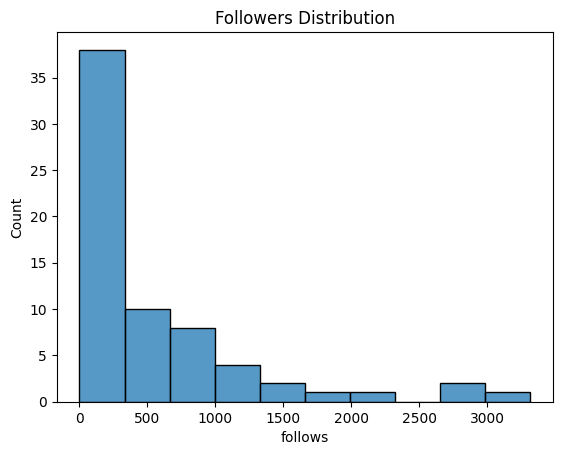

In [27]:
sns.histplot(data = creators_df, x = 'follows')
plt.title('Followers Distribution');

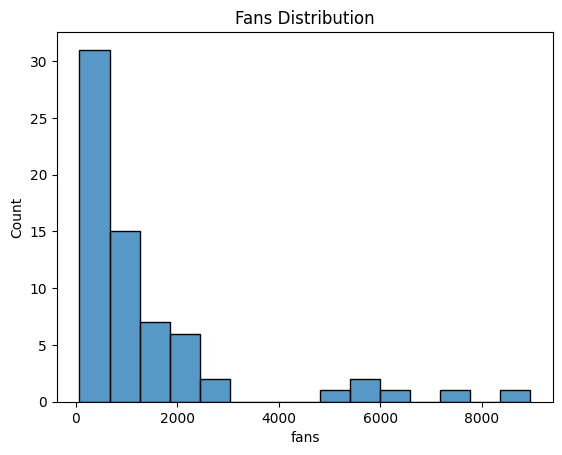

In [28]:
sns.histplot(data = creators_df, x = 'fans')
plt.title('Fans Distribution');

In [35]:
creators_df.describe()

,follows,fans,interaction,last_modify_ts,fans_follows_ratio
count,67.000000,67.000000,67.000000,6.700000e+01,67.000000
mean,560.492537,1368.716418,15374.731343,1.741954e+12,43.925596
std,701.205507,1777.105144,23479.149558,1.889935e+08,294.698376
min,3.000000,69.000000,1069.000000,1.741679e+12,0.179147
25%,121.500000,379.500000,4587.000000,1.741812e+12,0.918287
50%,307.000000,710.000000,8149.000000,1.741896e+12,2.250000
75%,815.000000,1632.000000,12880.000000,1.742072e+12,8.505155
max,3315.000000,8955.000000,147344.000000,1.742409e+12,2417.666667


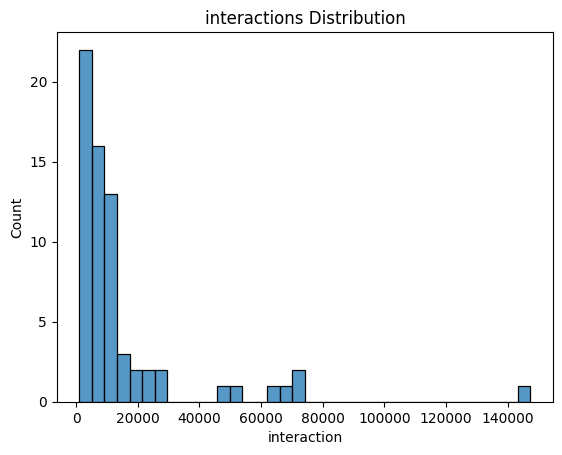

In [31]:
sns.histplot(data = creators_df, x = 'interaction')
plt.title('interactions Distribution');

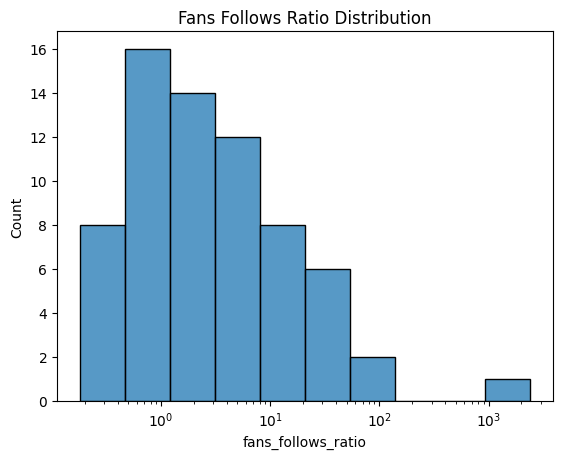

In [34]:
creators_df['fans_follows_ratio'] = creators_df.fans / creators_df.follows
sns.histplot(data = creators_df, x = 'fans_follows_ratio', log_scale=True, bins = 10)
plt.title('Fans Follows Ratio Distribution');

In [36]:
contents_df.head()

,note_id,type,title,desc,video_url,time,last_update_time,user_id,nickname,avatar,...,collected_count,comment_count,share_count,ip_location,image_list,tag_list,last_modify_ts,note_url,source_keyword,xsec_token
0,67d0d605000000002903d86a,normal,有没有和我一样【吃茶三千】一喝一个不吱声的,连地址都不想写了[笑哭R]\n虽然环境还不错，颜值也不错\n但我感觉自己完全拔草了\n尝了m...,,1741739525000,2025-03-12 00:32:06,576d3bde82ec3952ff40c5e1,达拉斯小鸡腿,https://sns-avatar-qc.xhscdn.com/avatar/61df4c...,...,2,10,3,美国,http://sns-webpic-qc.xhscdn.com/202503120852/b...,"达拉斯网红奶茶,达拉斯奶茶,达拉斯,达拉斯生活,达拉斯美食,达拉斯周边,达拉斯探店",1741740908175,https://www.xiaohongshu.com/explore/67d0d60500...,,ABSpxxhbCOtTiDM1Z6Y5fFluSJE-UWXQzG6OX9Q9HAnE0=
1,67c8960f000000002503ff5f,normal,【达拉斯·玩】超治愈系手工体验！MUMU Garden,"📍301 W Parker Rd #208[话题]#, Plano, TX 75023（快乐...",,1741198863000,2025-03-05 18:21:04,576d3bde82ec3952ff40c5e1,达拉斯小鸡腿,https://sns-avatar-qc.xhscdn.com/avatar/61df4c...,...,23,7,37,美国,http://sns-webpic-qc.xhscdn.com/202503120852/7...,"208,达拉斯生活,达拉斯探店,达拉斯,达拉斯吃喝玩乐,达拉斯手工,达拉斯周末,达拉斯周边,...",1741740908248,https://www.xiaohongshu.com/explore/67c8960f00...,,AB3ke1aQNxQZscPaUXBq4LkbDVHt_mVF_w1f0UC8j-d40=
2,67b2c2f0000000002602e61d,normal,【达拉斯·吃】米其林推荐川菜主厨空降达拉斯？,"📍2528 Old Denton Rd, Carrollton, TX 75006\n听说米...",,1739768560000,2025-02-17 15:09:01,576d3bde82ec3952ff40c5e1,达拉斯小鸡腿,https://sns-avatar-qc.xhscdn.com/avatar/61df4c...,...,80,38,155,美国,http://sns-webpic-qc.xhscdn.com/202503120852/f...,"达拉斯美食,达拉斯生活,Texas,达拉斯,达拉斯周边美食,达拉斯探店,达拉斯川菜,carr...",1741740908264,https://www.xiaohongshu.com/explore/67b2c2f000...,,ABG77tfdlwQLJhKRQTQZtoBD7ge1POM0Bh0jyYV3hPujo=
3,67a926770000000029011c49,normal,【达拉斯·吃】许留山这几碗糯唧唧绝了！,"Hui Liu Shan\n📍2540 Old Denton Rd Ste 310, Car...",,1739138679000,2025-02-10 02:52:04,576d3bde82ec3952ff40c5e1,达拉斯小鸡腿,https://sns-avatar-qc.xhscdn.com/avatar/61df4c...,...,20,5,15,美国,http://sns-webpic-qc.xhscdn.com/202503120852/1...,"达拉斯,德州,达拉斯美食,德州美食,达拉斯探店,达拉斯生活,许留山,达拉斯甜品,达拉斯网红甜...",1741740908290,https://www.xiaohongshu.com/explore/67a9267700...,,ABtje6jsU3oGw8w-rSGTCria9hgCuQx2NWTEXz-ZMWbl8=
4,67a3d27600000000290360e3,normal,【达拉斯·喝】Frosty Fox奶茶礼盒开箱,大过年的没想到收到一个奶茶礼盒做开箱分享！新年快乐[大笑R]\nFrosty Fox是一家从...,,1738789494000,2025-02-06 00:57:09,576d3bde82ec3952ff40c5e1,达拉斯小鸡腿,https://sns-avatar-qc.xhscdn.com/avatar/61df4c...,...,4,4,2,,http://sns-webpic-qc.xhscdn.com/202503120852/9...,"达拉斯奶茶,达拉斯网红奶茶,达拉斯美食,德州美食,达拉斯生活,德州生活,frostyfox,...",1741740908312,https://www.xiaohongshu.com/explore/67a3d27600...,,ABsKHG-EnljPoMxH2CQeHcuyEQPlnPONIeS2emRixO76o=


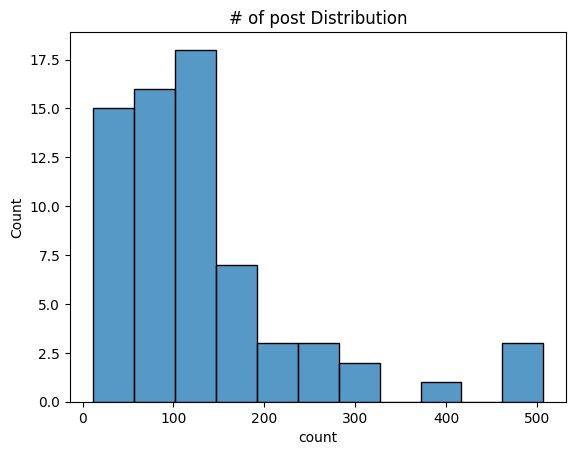

In [40]:
sns.histplot(contents_df.nickname.value_counts())
plt.title('# of post Distribution');

In [41]:
contents_df.type.value_counts()

type
normal    7234
video     1830
Name: count, dtype: int64

In [45]:
video_ratio = contents_df.groupby(['nickname','type']).size().unstack().fillna(0).reset_index()
video_ratio['video_ratio'] = video_ratio.video / (video_ratio.video + video_ratio.normal)

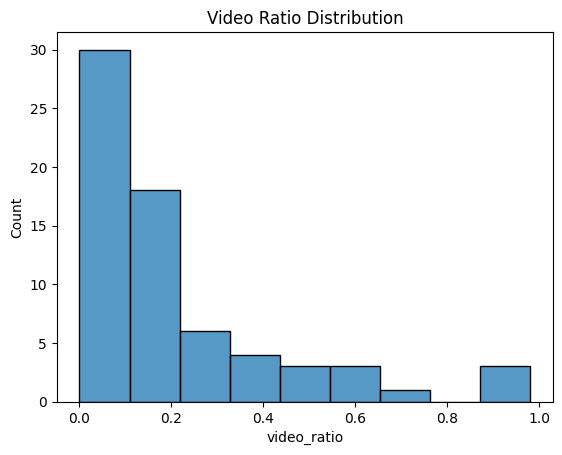

In [47]:
sns.histplot(video_ratio.video_ratio)
plt.title('Video Ratio Distribution');

In [52]:
creators_df = pd.merge(creators_df, video_ratio[['nickname', 'video_ratio', 'normal']], on = 'nickname')

<Axes: xlabel='video_ratio', ylabel='interaction'>

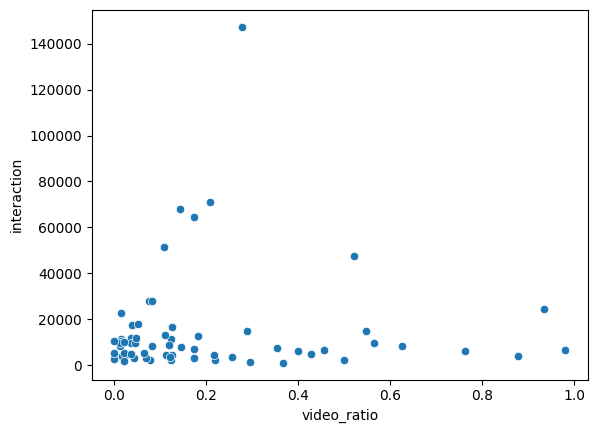

In [53]:
sns.scatterplot(data = creators_df, x = 'video_ratio', y = 'interaction')

In [54]:
contents_df.columns

Index(['note_id', 'type', 'title', 'desc', 'video_url', 'time',
       'last_update_time', 'user_id', 'nickname', 'avatar', 'liked_count',
       'collected_count', 'comment_count', 'share_count', 'ip_location',
       'image_list', 'tag_list', 'last_modify_ts', 'note_url',
       'source_keyword', 'xsec_token'],
      dtype='object')

In [59]:
contents_df['time'] = pd.to_datetime(contents_df.time, unit = 'ms')

In [60]:
contents_df.time.describe()

count                             9064
mean     2023-04-29 12:30:28.266548992
min                2017-01-30 04:28:50
25%      2022-05-01 19:22:37.750000128
50%                2023-07-10 04:05:17
75%         2024-06-06 12:01:48.500000
max                2025-03-17 04:06:29
Name: time, dtype: object

In [64]:
time_length = contents_df.groupby('nickname') \
    .agg(oldest = ('time', 'min'), newest = ('time', 'max')).reset_index()
time_length['length'] = time_length.newest - time_length.oldest

In [66]:
creators_df = pd.merge(creators_df, time_length[['nickname', 'length']], on = 'nickname')

<Axes: xlabel='length', ylabel='Count'>

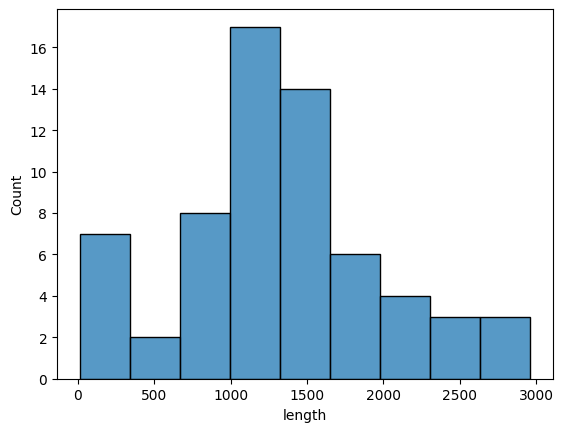

In [67]:
sns.histplot(creators_df.length.dt.days)

In [72]:
creators_df['length_day'] = creators_df.length.dt.days

<Axes: xlabel='length_day', ylabel='interaction'>

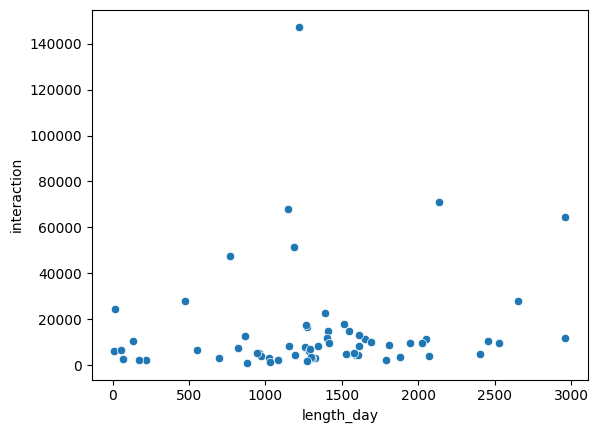

In [73]:
sns.scatterplot(data = creators_df, x = 'length_day', y = 'interaction')